# Task 1: Principal Component Analysis

## Applying PCA to a point data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First, we import the two dimensional data set:

In [2]:
raw_data = np.loadtxt('data/pca_dataset.txt')
N, n = raw_data.shape
print(f'N = {N}, n = {n}')
print('first 5 points:\n', raw_data[:5])

N = 100, n = 2
first 5 points:
 [[ 1.62434536  0.76745983]
 [-0.61175641 -0.18342744]
 [-0.52817175 -0.22373671]
 [-1.07296862 -0.47712646]
 [ 0.86540763  0.32321263]]


In [3]:
def center_data(uncentered: np.ndarray) -> np.ndarray:
    """Centers a dataset, i.e. each component is substracted the mean
       of the column.

    Args:
        uncentered (np.ndarray): data to be centered
    """
    centered = np.zeros(uncentered.shape)
    mean = uncentered.mean(axis=0) # computes mean of every column (component)
    for i in range(centered.shape[1]):
        centered[:, i] = uncentered[:, i] - mean[i]
    return centered, mean

print(f'mean of every column:\n{raw_data.mean(axis=0)}')
centered_data, mean_data = center_data(raw_data)

print('first 5 points (centered):\n', centered_data[:5])

mean of every column:
[0.06058285 0.0455709 ]
first 5 points (centered):
 [[ 1.56376251  0.72188892]
 [-0.67233927 -0.22899834]
 [-0.5887546  -0.26930762]
 [-1.13355147 -0.52269736]
 [ 0.80482478  0.27764173]]


Then, we perform singular value decomposition. Let $X$ be the centered data. We want to get matrices $U$, $S$, $V$ such that $X=USV^\top$.
Note that the function `np.linalg.svd` returns $U$, $V^\top$ (instead of $V$) and $\sigma\equiv \text{diag}(S)$ instead of $S$, i.e. a vector containing the diagonal elements of $S$. It is useful to store $\sigma$, as it is the vector of singular values.

In [4]:
u, sigma, vt = np.linalg.svd(centered_data)
v = vt.T  # because svd returns V^T, not V
s = np.zeros((N, n))  # S might not be square!
# construct S from sigma
for i in range(len(sigma)):
    s[i, i] = sigma[i] 

def decompose_svd(x: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Performs principal value decomposition of a matrix X.
       Returns matrices U, S, V such that X = USV^T

    Args:
        x (np.ndarray): matrix X
    """

    u, sigma, vt = np.linalg.svd(x)
    v = vt.T  # because np.linalg.svd returns V^T, not V
    s = np.zeros(x.shape)  # S might not be square!
    # construct S from sigma
    for i in range(len(sigma)):
        s[i, i] = sigma[i]

    return u, s, v

u, s, v = decompose_svd(centered_data)
sigma = np.diag(s)  # vector of singular values
print(f'singular values:\n{sigma}')
print(f'principal components:\n', v)

singular values:
[9.94340494 0.82624201]
principal components:
 [[-0.88938337  0.45716213]
 [-0.45716213 -0.88938337]]


We get the "energies" of each component:

In [5]:
def get_energies(singular_values: np.ndarray) -> np.ndarray:
    """returns an energy matrix, i.e. a diagonal matrix where the i-th element
    is the variance explained by the i-th principal component.
       
    Args:
        singular_values: vector containing all singular values, i.e.
        the diagonal part of S where S comes from the SVD X = USV^T.
    """
    sv = np.diag(singular_values)  # square, diagonal matrix
    energy = sv**2 / np.trace(sv @ sv)  
    return energy  

energy = get_energies(np.diag(s))
print(f'energies:\n{energy}')

energies:
[[0.99314266 0.        ]
 [0.         0.00685734]]


## Reconstructing

In [6]:
def reconstruct(u: np.ndarray, s: np.ndarray, v: np.ndarray, 
                r: int) -> np.ndarray:
    """Reconstructs (reduces) a dataset with a reduced number of 
       principal components. 

    Args:
        r (int): number of leading principal components to consider 
        s, u, v (np.ndarray): matrices from the singular value decomposition
            of the dataset
    """
    
    threshold = np.sort(np.diag(s))[-r] # r-th largest value
    s_reduced = np.copy(s)
    print()
    for i in range(len(np.diag(s))):
        if s_reduced[i, i] < threshold:
            s_reduced[i, i] = 0
    data_reduced = u @ s_reduced @ v.T
    return data_reduced

In [7]:
centered_data_reduced = reconstruct(u, s, v, r=1)

In [8]:
def uncenter_data(centered: np.ndarray, mean: np.ndarray) -> np.ndarray:
    """Un-centers a dataset, i.e. each component is substracted the mean
       of the column.

    Args:
        centered (np.ndarray): data to be un-centered
        mean (np.ndarray): vector where the i-th component is the mean
                           of the i-th column
    """

    uncentered = np.zeros(centered.shape)
    for i in range(centered.shape[1]):
        uncentered[:, i] = centered[:, i] + mean[i]
    return uncentered

reconstructed_data = uncenter_data(centered_data_reduced, mean_data)
print('first 5 points of reduced data:\n', reconstructed_data[:5])

first 5 points of reduced data:
 [[ 1.5910379   0.83225763]
 [-0.56434836 -0.27565715]
 [-0.51462211 -0.25009679]
 [-1.04858429 -0.52456481]
 [ 0.81008851  0.43083289]]


### Plot results

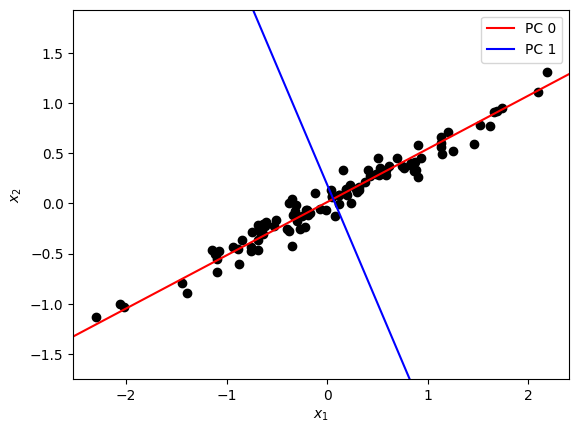

In [9]:
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(*raw_data.T, c='black')  # plot raw data

# plot principal components
plt.axline(tuple(mean_data), tuple(v[:, 0]), label=f'PC 0', c='red')
plt.axline(tuple(mean_data), tuple(v[:, 1]), label=f'PC 1', c='blue')
plt.legend()
plt.axis('equal')
plt.savefig('figures/task1_pca.pdf')
plt.show()


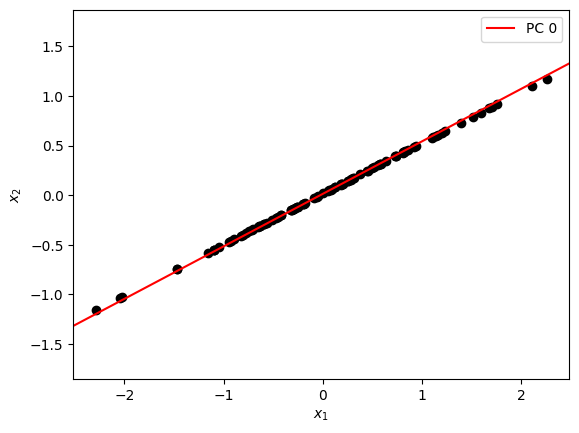

In [24]:
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.scatter(*reconstructed_data.T, c='black')  # plot raw data

# plot principal components
plt.axline(tuple(mean_data), tuple(v[:, 0]), label=f'PC 0', c='red')
# plt.axline(tuple(mean_data), tuple(v[:, 1]), label=f'PC 1', c='blue')
plt.legend()
plt.axis('equal')
plt.savefig('figures/task1_pca_reconstructed1.pdf')
plt.show()

## Applying PCA to an image

In [10]:
from PIL import Image
from scipy.misc import face

image_ = np.array(Image.fromarray(face(gray=True)).resize((249, 185)))

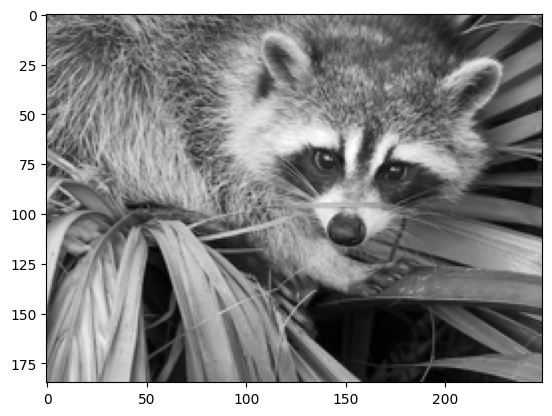

In [11]:
# we transpose the image because we want 249 points, i.e. one for every column
image = image_.T
plt.imshow(image.T, cmap='gray')  # for visualizing purposes, we transpose back

In [12]:
centered_image, mean_image = center_data(image)
u_im, s_im, v_im = decompose_svd(centered_image)

print(s_im)

[[5939.70738472    0.            0.         ...    0.
     0.            0.        ]
 [   0.         4347.72628213    0.         ...    0.
     0.            0.        ]
 [   0.            0.         3335.98752616 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]


In [13]:
reconstructed_images = dict()
energies = []

for num_pc in range(1, s_im.shape[1] + 1):
    reconstructed = reconstruct(u_im, s_im, v_im, r=num_pc)
    energy_matrix = get_energies(np.diag(s_im))

    energy = np.sum(np.diag(energy_matrix[:num_pc, :num_pc]))
    energies.append(energy)

    if num_pc in [s_im.shape[1], 120, 50, 10]:
        image_reconstructed = np.zeros(reconstructed.shape)

        for i in range(image_reconstructed.shape[1]):  # add mean from every column
            image_reconstructed[:, i] = reconstructed[:, i] + mean_image[i]  
        print(f'energy with {num_pc} components: {energy:.3f}')
        reconstructed_images.update({num_pc: image_reconstructed})











energy with 10 components: 0.812








































energy with 50 components: 0.968






































































energy with 120 components: 0.997

































































energy with 185 components: 1.000


We plot the energy as a function of the number of components:

[Text(1, 0, '1'), Text(40, 0, '40'), Text(80, 0, '80'), Text(120, 0, '120'), Text(160, 0, '160'), Text(185, 0, '185')]


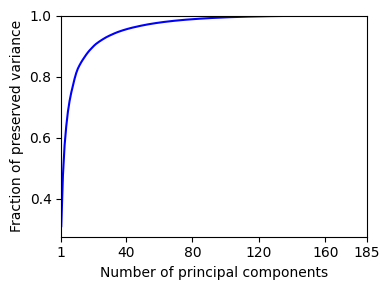

In [14]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(4, 3))

plt.plot(list(range(1, s_im.shape[1] + 1)), energies, c='blue')

plt.ylim(top=1)
plt.ylabel('Fraction of preserved variance')

ax.xaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))

ax.set_xlabel('Number of principal components')
ax.set_xlim([1, s_im.shape[1]])

# force integer labels and add min and max labels
xt = ax.get_xticks()
xt[0] = 1
xt[-1] = s_im.shape[1]

xtl = xt.tolist()
xtl[0] = "1"
xtl[-1] = str(s_im.shape[1])

ax.set_xticks(list(map(int, xt)))
ax.set_xticklabels([plt.Text(int(x), 0, str(int(x))) for x in xt])

print(ax.get_xticklabels())

fig.tight_layout()

fig.savefig('figures/task1_image_preserved_variance.pdf')
plt.show()

In [15]:
for i, energy in enumerate(energies):
    if energy >= 0.99:
        print(f'99% of the energy is preserved with N>={i+1} components.')
        break

99% of the energy is preserved with N>=86 components.


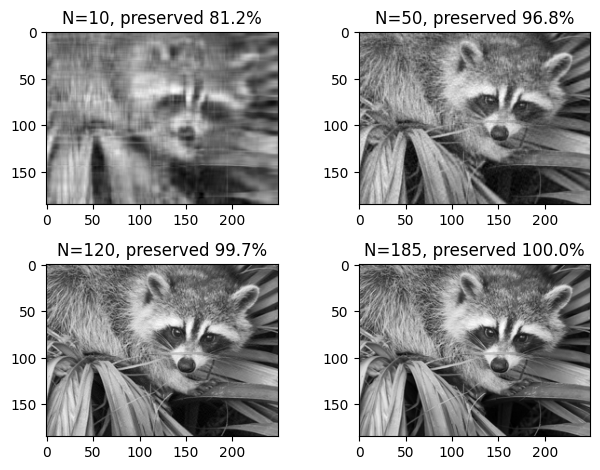

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2)
for i, (num_pc, im) in enumerate(reconstructed_images.items()):
    ax = axs.flatten()[i]
    ax.set_title(f'N={num_pc}, preserved {energies[num_pc-1]:.1%}')
    ax.imshow(im.T, cmap='gray')
fig.tight_layout()
fig.savefig('figures/task1_image_reconstructed.pdf')
plt.show()

## Applying PCA to pedestrian trajectories

In [17]:
trajectory = np.loadtxt('data/data_DMAP_PCA_vadere.txt')
centered_trajectory, mean_trajectory = center_data(trajectory)

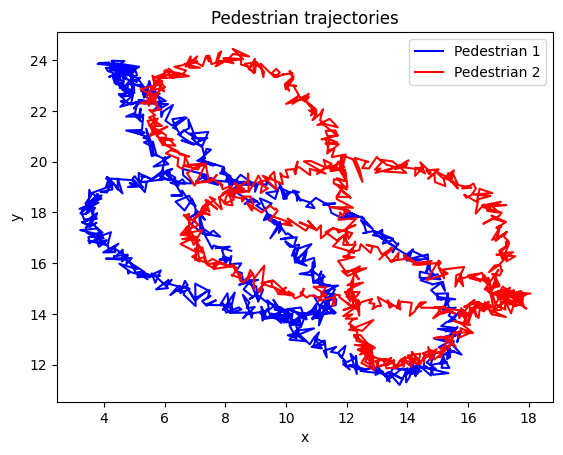

In [18]:
plt.title('Pedestrian trajectories')
plt.plot(trajectory[:, 0], trajectory[:, 1], label='Pedestrian 1', c='blue')
plt.plot(trajectory[:, 2], trajectory[:, 3], label='Pedestrian 2', c='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('figures/task1_trajectories.pdf')
plt.show()

Now, we reconstruct the trajectories of all pedestrians with two principal components.

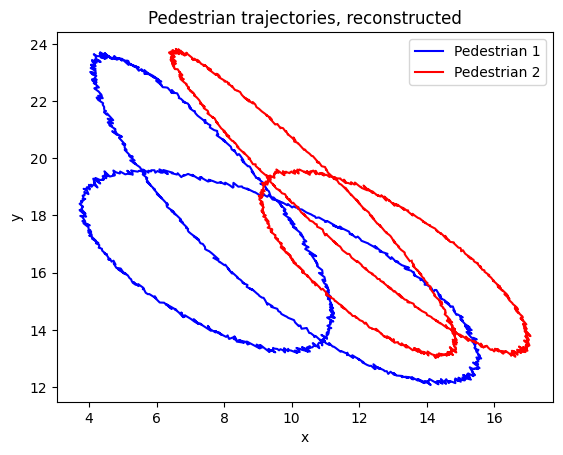

In [19]:
u_traj, s_traj, v_traj = decompose_svd(centered_trajectory)
centered_reconstructed_trajectory = reconstruct(u_traj, s_traj, v_traj, r=2)
reconstructed_trajectory = uncenter_data(centered_reconstructed_trajectory, mean_trajectory)

plt.title('Pedestrian trajectories, reconstructed')
plt.plot(reconstructed_trajectory[:, 0], reconstructed_trajectory[:, 1],
            label='Pedestrian 1', c='blue')
plt.plot(reconstructed_trajectory[:, 2], reconstructed_trajectory[:, 3],
            label='Pedestrian 2', c='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('figures/task1_trajectories_reconstructed.pdf')
plt.show()

We can also compare the original and reconstructed trajectories:

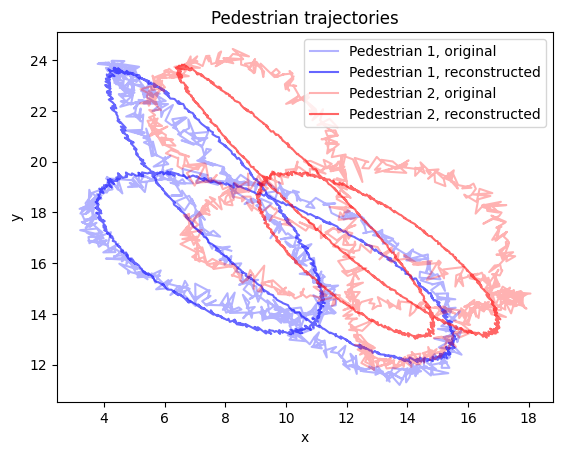

In [20]:
plt.title('Pedestrian trajectories')
plt.plot(trajectory[:, 0], trajectory[:, 1],
            alpha=0.3, label='Pedestrian 1, original', c='blue')
plt.plot(reconstructed_trajectory[:, 0], reconstructed_trajectory[:, 1],
            alpha=0.6, label='Pedestrian 1, reconstructed', c='blue')
plt.plot(trajectory[:, 2], trajectory[:, 3], 
            alpha=0.3, label='Pedestrian 2, original', c='red')
plt.plot(reconstructed_trajectory[:, 2], reconstructed_trajectory[:, 3],
            alpha=0.6, label='Pedestrian 2, reconstructed', c='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('figures/task1_trajectories_comparison.pdf')
plt.show()

In [21]:
energy_matrix = get_energies(np.diag(s_traj))
r = 2  # number of principal components
energy = np.sum(energy_matrix[:r, :r])
print(f'The preserved energy for {r} components is {energy:.3f}')

The preserved energy for 2 components is 0.849


In [22]:
for i in range(n):
    reconstructed_trajectory = reconstruct(u_traj, s_traj, v_traj, r=i)
    sv_traj = s_traj[:i, :i]
    energy = np.sum(np.diag(sv_traj**2)) / np.trace(s_traj[:n, :n] @ s_traj[:n, :n])
    if energy > 0.9:
        print(f'With r>={i} components we preserve more than 90% of the data set')
        break